# 3SI3R model for Rumors spreading
<center><img src = "model.png"> </center>

In [1]:
import pandas as pd
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

### Define parameters
<center><img src="Parameters.png"></center>

In [2]:
I0  = 0.990
S1_0 = 0.009
S2_0 = 0.001
S3_0 = 0
R1_0 = 0
R2_0 = 0
R3_0 = 0
a = mu = 0.0001
lambda1 = lambda2 = 0.02
gama1 = gama2 = 0.02
alpha1 = alpha2 = alpha3 = 0.02
sigma1 = sigma2 = 0.02
kc = 20
N1 = N2 = 0.1

#Basic Scenario
epsilon = 1.2000
lambda3 = 0.0288
beta1 = beta2 =  0.0240
delta1 = delta2 = 0.0200
delta3 = 0.0100
S1_0 = 0.0090
S2_0 = 0.0010

In [7]:
# equations in homogeneous network are described as follows:

def deriv(y, t, epsilon, lambda3, beta1, beta2, delta1, delta2, delta3):
    I, S1, S2, S3, R1, R2, R3 = y
    dIdT = a - (lambda1 * I * S1 * kc) - (lambda2 * I * S2 * kc) - (lambda3 * I * S3 * kc) - (mu * I)
    dS1dT = (lambda1 * I * S1 * kc) - (gama1 * S1 * R1 * kc) - (beta1 * S1 * (S2 + S3) * kc) - (sigma1 * S1 * R3 * kc) - (delta1 * S1) - (mu * S1)
    dS2dT = (lambda2 * I * S2 * kc) - (gama2  * S2 * R2 * kc) - (beta2 * S2 * (S1 + S3) * kc) - (sigma2 * S2 * R3 * kc) - (delta2 * S2) - (mu * S2)
    dS3dT = (lambda3 * I * S3 * kc) + (beta1 * S1 * (S2 + S3) * kc) + (beta2 * S2 * (S1 + S3) * kc) - (alpha1 * S3 * R1 * kc) - (alpha2 * S3 * R2 * kc) - (alpha3 * S3 * R3 * kc) - (delta3 * S3) - (mu * S3)
    dR1dT = (gama1 * S1 * R1 * kc) + (alpha1 * S3 * R1 * kc) - (N1 * R1) + (delta1 * S1) - (mu * R1)
    dR2dT = (gama2 * S2 * R2 * kc) + (alpha2 * S3 * R2 * kc) - (N2 * R2) + (delta2 * S2) - (mu * R2)
    dR3dT = (sigma1 * S1 * R3 * kc) + (sigma2 * S2 * R3 * kc) + (alpha3 * S3 * R3 * kc) + (N1 * R1) + (N2 * R2) + (delta3 * S3) - (mu * R3)

    return dIdT, dS1dT, dS2dT, dS3dT, dR1dT, dR2dT, dR3dT

In [9]:
# Total population, N.
N = 1000
# A grid of time points (in days)
t = np.linspace(0, 160, 160)
# Initial conditions vector
y0 = I0, S1_0, S2_0, S3_0, R1_0, R2_0, R3_0
# Integrate the SIR equations over the time grid, t.
ret = odeint(deriv, y0, t, args=(epsilon, lambda3, beta1, beta2, delta1, delta2, delta3))

In [10]:
I, S1, S2, S3, R1, R2, R3 = ret.T

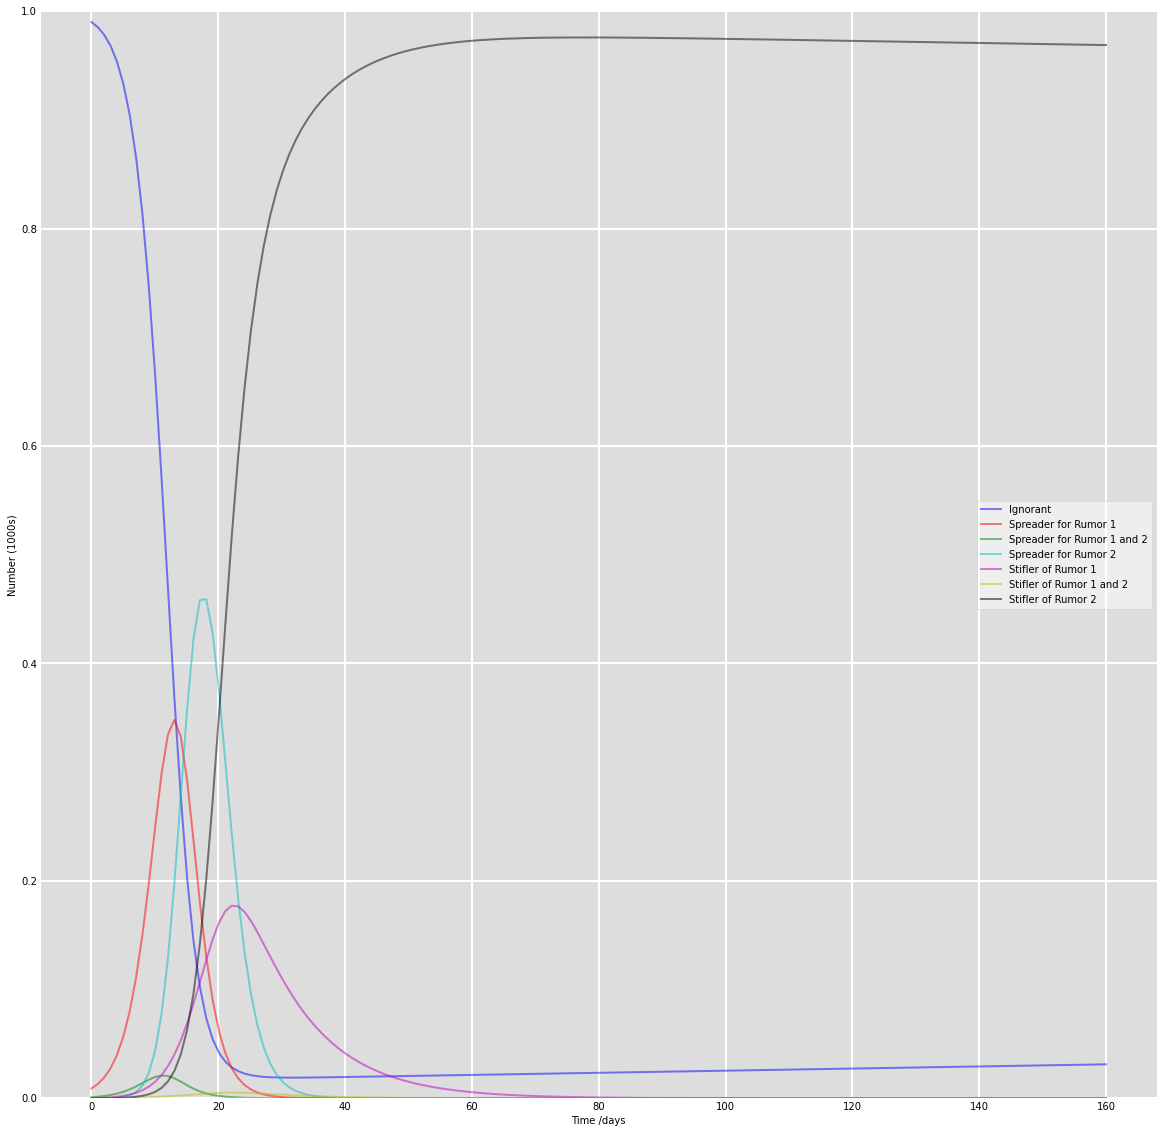

In [12]:
fig = plt.figure(facecolor='w',figsize=(20,20))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I, 'b', alpha=0.5, lw=2, label='Ignorant')
ax.plot(t, S1, 'r', alpha=0.5, lw=2, label='Spreader for Rumor 1')
ax.plot(t, S2, 'g', alpha=0.5, lw=2, label='Spreader for Rumor 1 and 2')
ax.plot(t, S3, 'c', alpha=0.5, lw=2, label='Spreader for Rumor 2')
ax.plot(t, R1, 'm', alpha=0.5, lw=2, label='Stifler of Rumor 1')
ax.plot(t, R2, 'y', alpha=0.5, lw=2, label='Stifler of Rumor 1 and 2')
ax.plot(t, R3, 'k', alpha=0.5, lw=2, label='Stifler of Rumor 2')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [13]:
# Mutual promotion SC1
epsilon = 0.000
lambda3 = 0.000
beta1 = beta2 =  0.000
delta1 = delta2 = 0.0200
delta3 = 0.0100
S1_0 = 0.0090
S2_0 = 0.0010

In [14]:
ret = odeint(deriv, y0, t, args=(epsilon, lambda3, beta1, beta2, delta1, delta2, delta3))

In [15]:
I, S1, S2, S3, R1, R2, R3 = ret.T

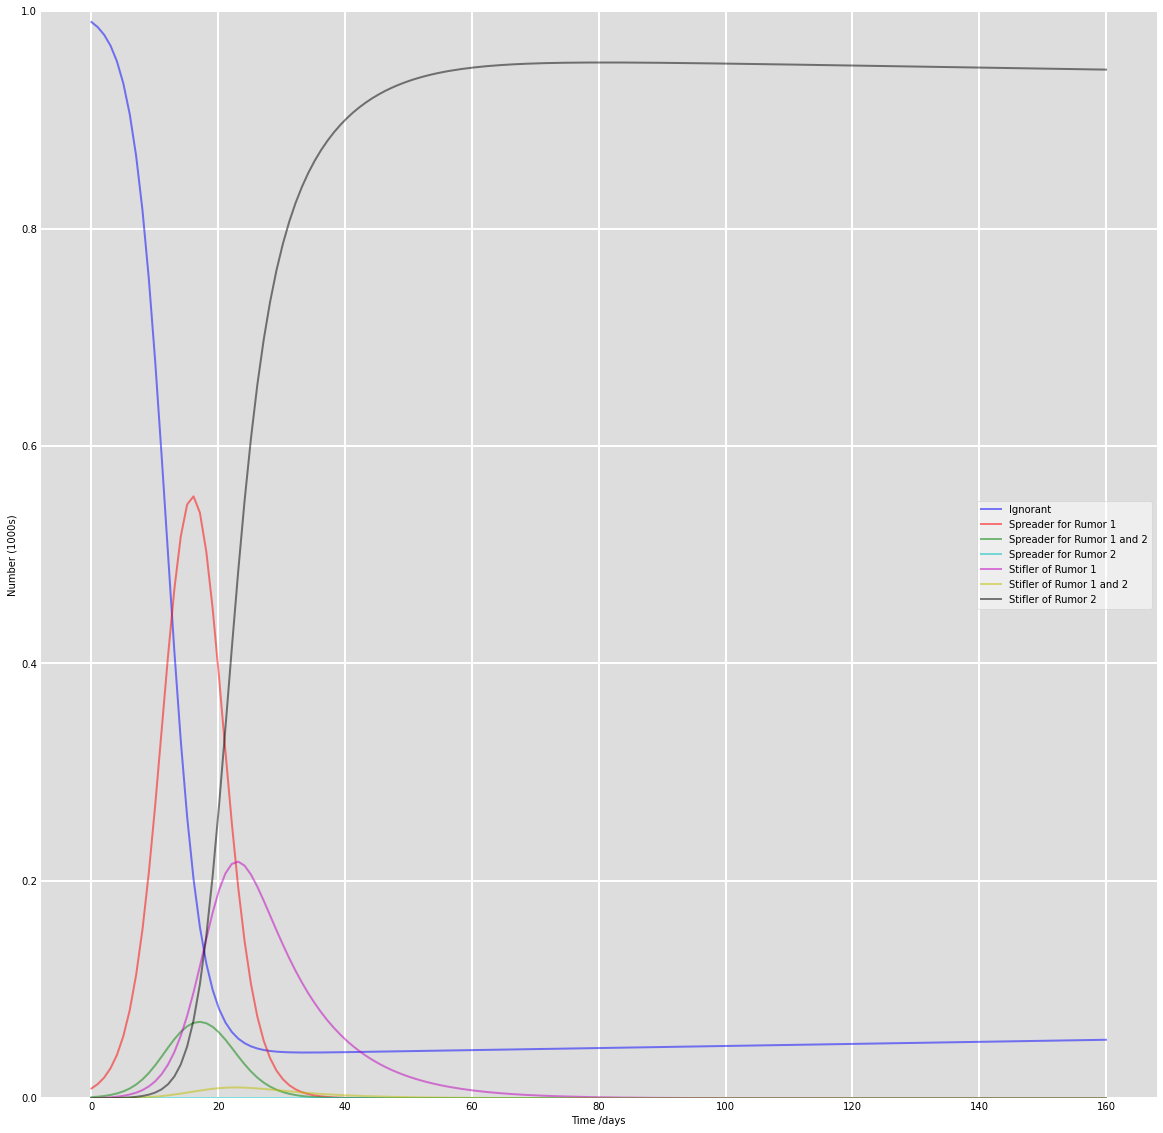

In [16]:
fig = plt.figure(facecolor='w',figsize=(20,20))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I, 'b', alpha=0.5, lw=2, label='Ignorant')
ax.plot(t, S1, 'r', alpha=0.5, lw=2, label='Spreader for Rumor 1')
ax.plot(t, S2, 'g', alpha=0.5, lw=2, label='Spreader for Rumor 1 and 2')
ax.plot(t, S3, 'c', alpha=0.5, lw=2, label='Spreader for Rumor 2')
ax.plot(t, R1, 'm', alpha=0.5, lw=2, label='Stifler of Rumor 1')
ax.plot(t, R2, 'y', alpha=0.5, lw=2, label='Stifler of Rumor 1 and 2')
ax.plot(t, R3, 'k', alpha=0.5, lw=2, label='Stifler of Rumor 2')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()

In [17]:
# Forgetting rate SC3
epsilon = 1.200
lambda3 = 0.0288
beta1 = beta2 =  0.0240
delta1 = delta2 = 0.0400
delta3 = 0.0300
S1_0 = 0.0090
S2_0 = 0.0010


In [18]:
ret = odeint(deriv, y0, t, args=(epsilon, lambda3, beta1, beta2, delta1, delta2, delta3))

In [19]:
I, S1, S2, S3, R1, R2, R3 = ret.T

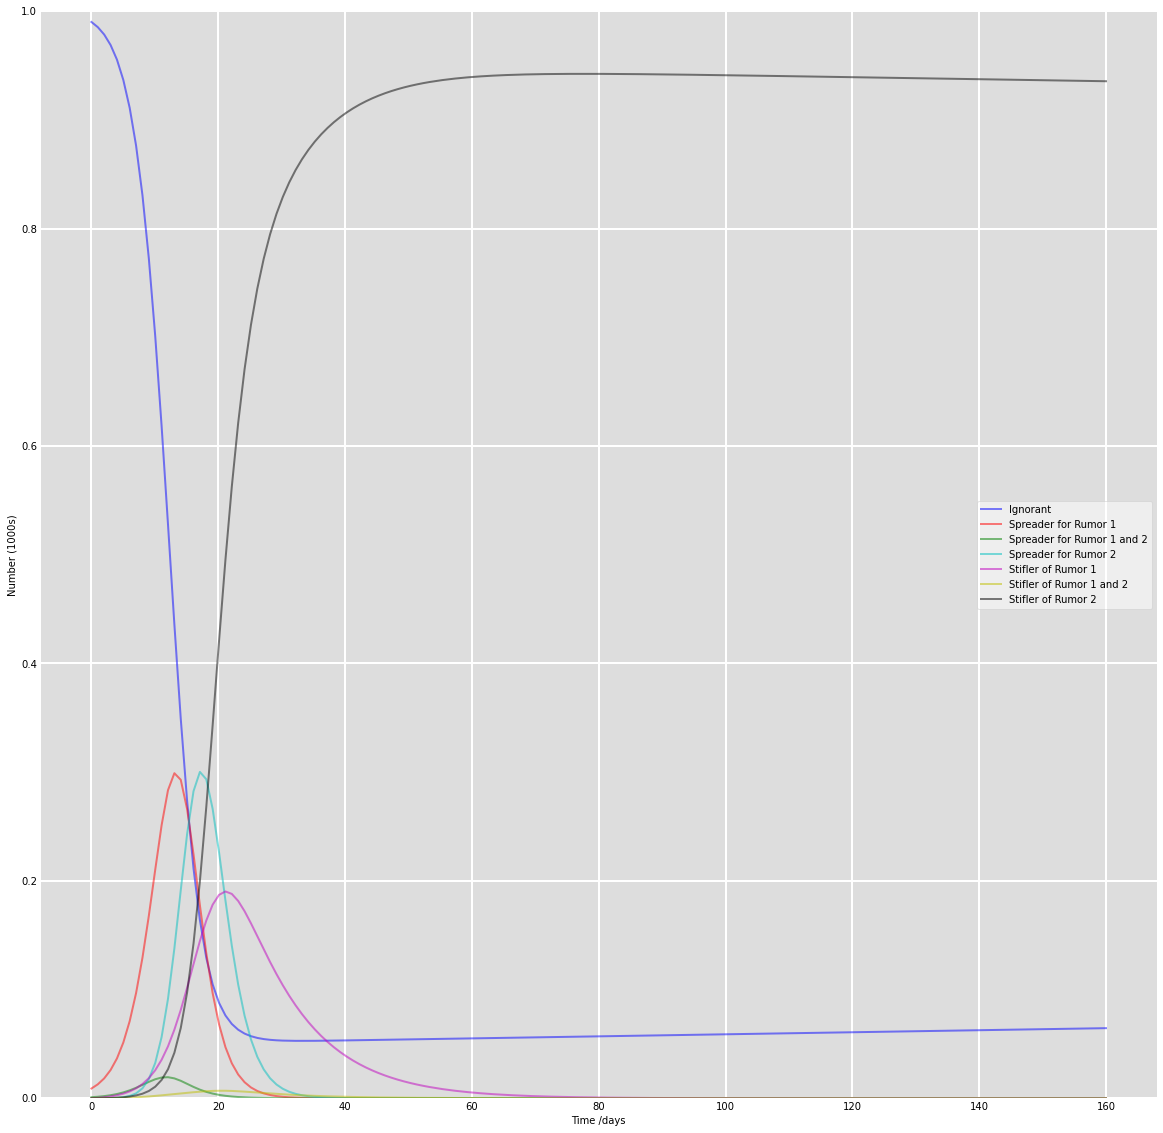

In [20]:
fig = plt.figure(facecolor='w',figsize=(20,20))
ax = fig.add_subplot(111, facecolor='#dddddd', axisbelow=True)
ax.plot(t, I, 'b', alpha=0.5, lw=2, label='Ignorant')
ax.plot(t, S1, 'r', alpha=0.5, lw=2, label='Spreader for Rumor 1')
ax.plot(t, S2, 'g', alpha=0.5, lw=2, label='Spreader for Rumor 1 and 2')
ax.plot(t, S3, 'c', alpha=0.5, lw=2, label='Spreader for Rumor 2')
ax.plot(t, R1, 'm', alpha=0.5, lw=2, label='Stifler of Rumor 1')
ax.plot(t, R2, 'y', alpha=0.5, lw=2, label='Stifler of Rumor 1 and 2')
ax.plot(t, R3, 'k', alpha=0.5, lw=2, label='Stifler of Rumor 2')

ax.set_xlabel('Time /days')
ax.set_ylabel('Number (1000s)')
ax.set_ylim(0,1)
ax.yaxis.set_tick_params(length=0)
ax.xaxis.set_tick_params(length=0)
ax.grid(b=True, which='major', c='w', lw=2, ls='-')
legend = ax.legend()
legend.get_frame().set_alpha(0.5)
for spine in ('top', 'right', 'bottom', 'left'):
    ax.spines[spine].set_visible(False)
plt.show()